In [5]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Project 1 (P162) - Teli Churn\\telecommunications_churn.csv')

In [7]:
X=df.iloc[:,0:18]

In [8]:
Y=df.iloc[:,[18]]

In [10]:
kfold = KFold(n_splits = 10)

In [35]:
model = KNeighborsClassifier(n_neighbors=8)

In [36]:
results = cross_val_score(model,X,Y,cv=kfold)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [37]:
results.mean()

0.881170991350632

In [15]:
# Grid Search for best K Value

In [24]:
import numpy
from sklearn.model_selection import GridSearchCV

In [26]:
n_neighbors = numpy.array(range(1,50))
param_grid = dict(n_neighbors = n_neighbors)

In [27]:
model = KNeighborsClassifier()

In [29]:
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [31]:
grid.fit(X,Y)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [33]:
grid.best_score_

0.8823889856873365

In [34]:
grid.best_params_

{'n_neighbors': 8}

In [38]:
# Visulization Of K values and score 

In [39]:
import matplotlib.pyplot as plt

In [40]:
k_range = range(1,50)

In [41]:
k_score=[]

In [50]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn,X,Y,cv =10)
    k_score.append(score.mean())

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Text(0, 0.5, 'K_score')

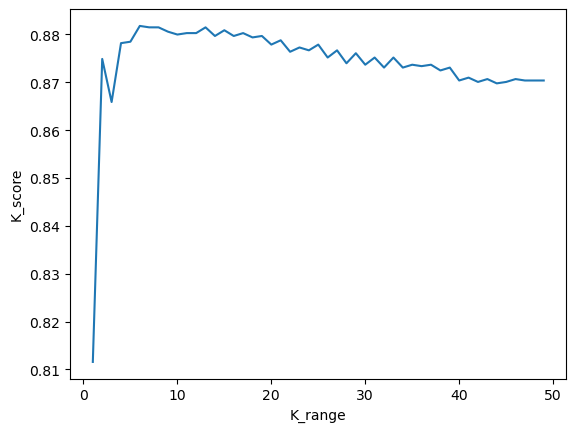

In [52]:
plt.plot(k_range,k_score)
plt.xlabel('K_range')
plt.ylabel('K_score')